Hecho en Colab.

Primero la sección de codigos de funciones a usar.

In [ ]:
# Función para encontrar valores atípicos POR el método de los cuartiles y el rango intercuartílico (IQR). chatgpt
def identificar_atipicos_IQR(df, columnas):
    atipicos = pd.DataFrame()  # DataFrame para almacenar filas con valores atípicos

    for columna in columnas:
        # Calcular Q1, Q3 y IQR
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar filas que tienen valores atípicos
        filas_atipicas = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

        # Concatenar filas atípicas al DataFrame de atípicos
        atipicos = pd.concat([atipicos, filas_atipicas])

    return atipicos.drop_duplicates()  # Eliminar duplicados
def ver_resumen_nulos(df):
    qna=df.isnull().sum(axis=0)
    qsna=df.shape[0]-qna

    ppna=round(100*(qna/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    resumen_nulos =na.sort_values(by='Na en %',ascending=False)
    return resumen_nulos
def desc(df, columns=None):
    """
    Genera un cuadro de estadísticas descriptivas con el porcentaje de std/mean incluido.

    Parameters:
    df (pd.DataFrame): El DataFrame a analizar.
    columns (list): Lista de columnas sobre las cuales aplicar el cálculo. Si es None, se incluyen todas las columnas numéricas.

    Returns:
    pd.DataFrame: DataFrame con estadísticas descriptivas y el porcentaje std/mean.
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Seleccionar todas las columnas numéricas si no se especifican

    # Generar el describe solo para las columnas seleccionadas
    df_describe = df[columns].describe().T

    # Calcular y agregar la columna del porcentaje std/mean
    df_describe['%std/mean'] = ((df_describe['std'] / df_describe['mean']) * 100).round(2)

    return df_describe

def desc_ceros(df, columns=None):
    """
    Genera un cuadro de estadísticas descriptivas filtrando columnas con mínimo o máximo igual a cero,
    e incluye el porcentaje de std/mean.

    Parameters:
    df (pd.DataFrame): El DataFrame a analizar.
    columns (list): Lista de columnas sobre las cuales aplicar el cálculo. Si es None, se incluyen todas las columnas numéricas.

    Returns:
    pd.DataFrame: DataFrame con estadísticas descriptivas y el porcentaje std/mean para las columnas filtradas.
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Seleccionar todas las columnas numéricas si no se especifican

    # Generar el describe solo para las columnas seleccionadas
    df_describe = df[columns].describe().T

    # Calcular y agregar la columna del porcentaje std/mean
    df_describe['%std/mean'] = ((df_describe['std'] / df_describe['mean']) * 100).round(2)

    # Filtrar las columnas donde el mínimo o el máximo sea igual a cero
    df_describe = df_describe[(df_describe['min'] == 0) | (df_describe['max'] == 0)]

    return df_describe

In [14]:
import pandas as pd

# Datos del diccionario
data = {
    "Columna": ["Age", "Sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                "exang", "oldpeak", "slope", "ca", "thal", "target"],
    "Tipo": ["int64", "int64", "int64", "int64", "int64", "int64", "int64", "int64",
             "int64", "float64", "int64", "int64", "int64", "int64"],
    "Descripción": [
        "Edad del paciente",
        "Sexo del paciente (1: Hombre, 0: Mujer)",
        "Tipo de dolor en el pecho (1: Angina típica, 2: Angina atípica, 3: Dolor no anginoso, 4: Asintomático)",
        "Presión arterial en reposo (mm Hg) al ingreso",
        "Nivel de colesterol sérico en mg/dl",
        "Nivel de azúcar en sangre en ayunas (>120 mg/dl: 1=True, 0=False)",
        "Resultados electrocardiográficos en reposo (0: Normal, 1: Anormalidad ST-T, 2: Hipertrofia ventricular)",
        "Frecuencia cardíaca máxima alcanzada",
        "Angina inducida por ejercicio (1: Sí, 0: No)",
        "Depresión del ST inducida por ejercicio relativa al reposo",
        "Pendiente del segmento ST en ejercicio (1: Ascendente, 2: Plano, 3: Descendente)",
        "Número de vasos principales coloreados por fluoroscopía (0-3)",
        "Tipo de talasemia (3: Normal, 6: Defecto fijo, 7: Defecto reversible)",
        "Presencia de enfermedad cardíaca (0: No, 1: Sí)"
    ],
    "Ejemplo": [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 6, 1]
}

# Crear el DataFrame
df_diccionario = pd.DataFrame(data)

# Mostrar el DataFrame
df_diccionario


,Columna,Tipo,Descripción,Ejemplo
0,Age,int64,Edad del paciente,63.0
1,Sex,int64,"Sexo del paciente (1: Hombre, 0: Mujer)",1.0
2,cp,int64,"Tipo de dolor en el pecho (1: Angina típica, 2...",3.0
3,trestbps,int64,Presión arterial en reposo (mm Hg) al ingreso,145.0
4,chol,int64,Nivel de colesterol sérico en mg/dl,233.0
5,fbs,int64,Nivel de azúcar en sangre en ayunas (>120 mg/d...,1.0
6,restecg,int64,Resultados electrocardiográficos en reposo (0:...,0.0
7,thalach,int64,Frecuencia cardíaca máxima alcanzada,150.0
8,exang,int64,"Angina inducida por ejercicio (1: Sí, 0: No)",0.0
9,oldpeak,float64,Depresión del ST inducida por ejercicio relati...,2.3


Descripción
# MLP con Early Stopping y Dropout (Core)

##Descripción:

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

Enlace al dataset: https://www.kaggle.com/ronitf/heart-disease-uci



Objetivo:

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.



Instrucciones:

#1. Carga de datos:
  ## - Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.


In [41]:
# prompt: descargar este dataset en el colab https://www.kaggle.com/ronitf/heart-disease-uci

#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el dataset
#!kaggle datasets download -d ketangangal/heart-disease-dataset-uci
#!unzip heart-disease-dataset-uci.zip

# Importar Pandas y cargar el dataset
import pandas as pd

df = pd.read_csv('HeartDiseaseTrain-Test.csv')  # Cambia el nombre según el archivo extraído
print(df.head())


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

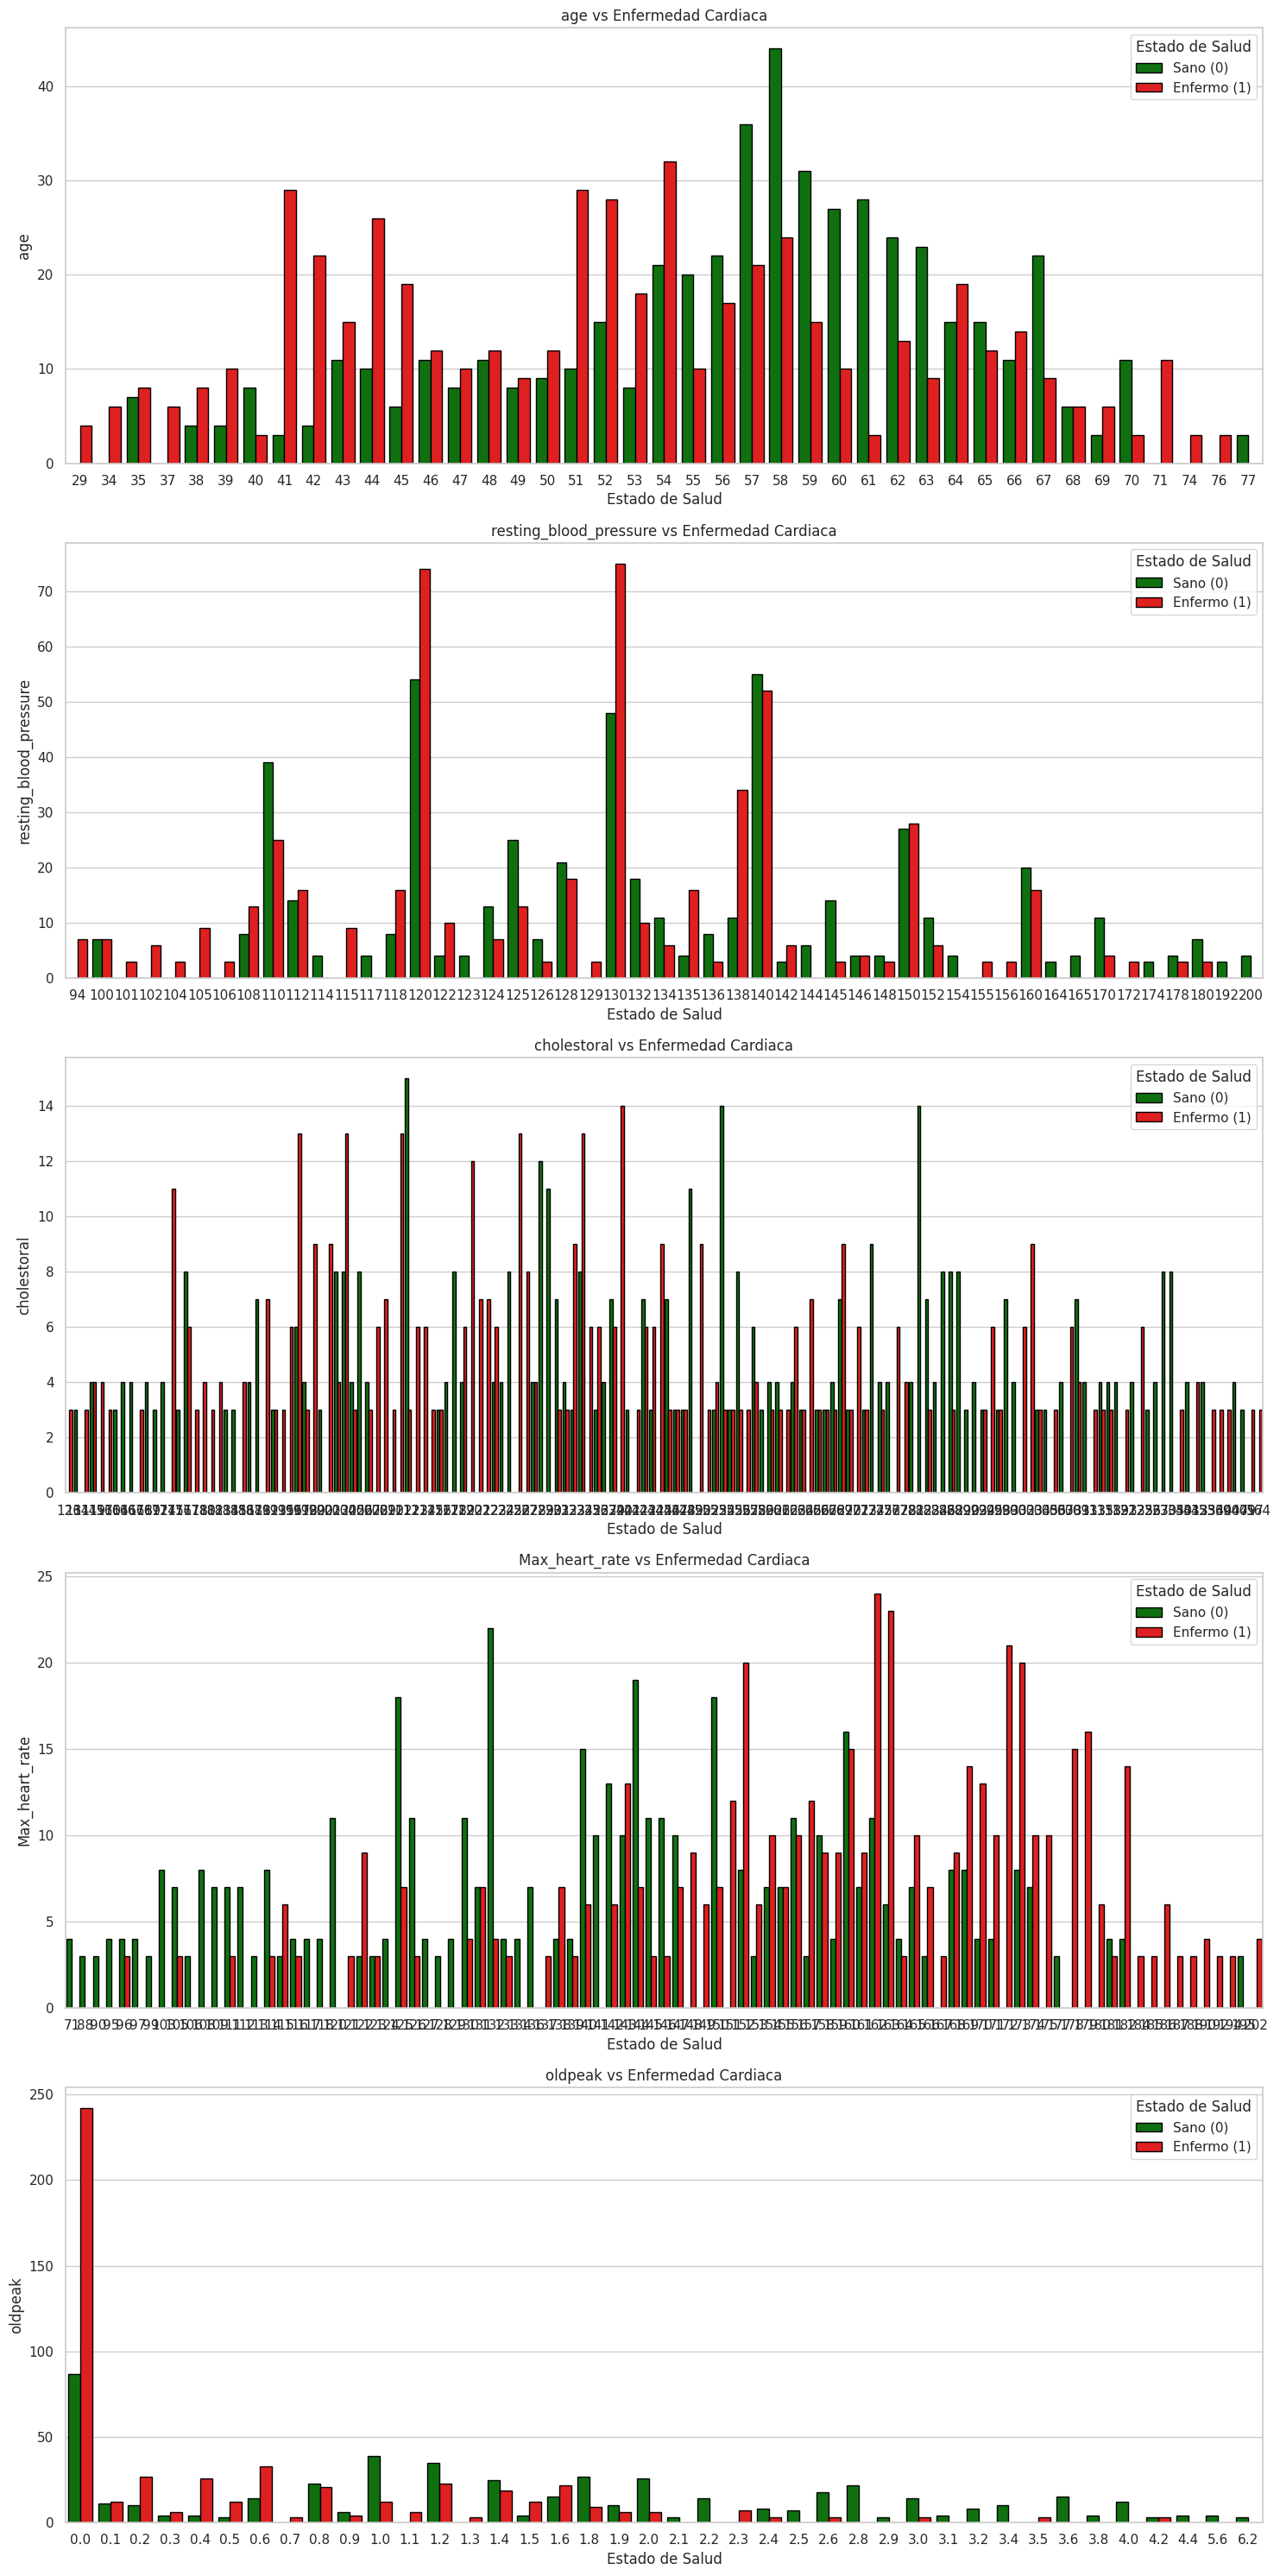

In [46]:
# Columnas numericas
numerical_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

# Definir los colores personalizados para el target
colors = {0: 'green', 1: 'red'}

# Crear la figura
plt.figure(figsize=(15, 30))

# Gráficos de cajas para características numéricas
for i, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i+1)
    ##sns.boxplot(x='target', y=feature, data=df, palette=colors)
    sns.countplot(x=feature, data=df, hue='target', palette=colors, edgecolor='black')
    plt.title(f'{feature} vs Enfermedad Cardiaca')
    plt.xlabel('Estado de Salud')
    plt.ylabel(feature)
    plt.legend(title='Estado de Salud', labels=['Sano (0)', 'Enfermo (1)'])

plt.tight_layout()
plt.show()



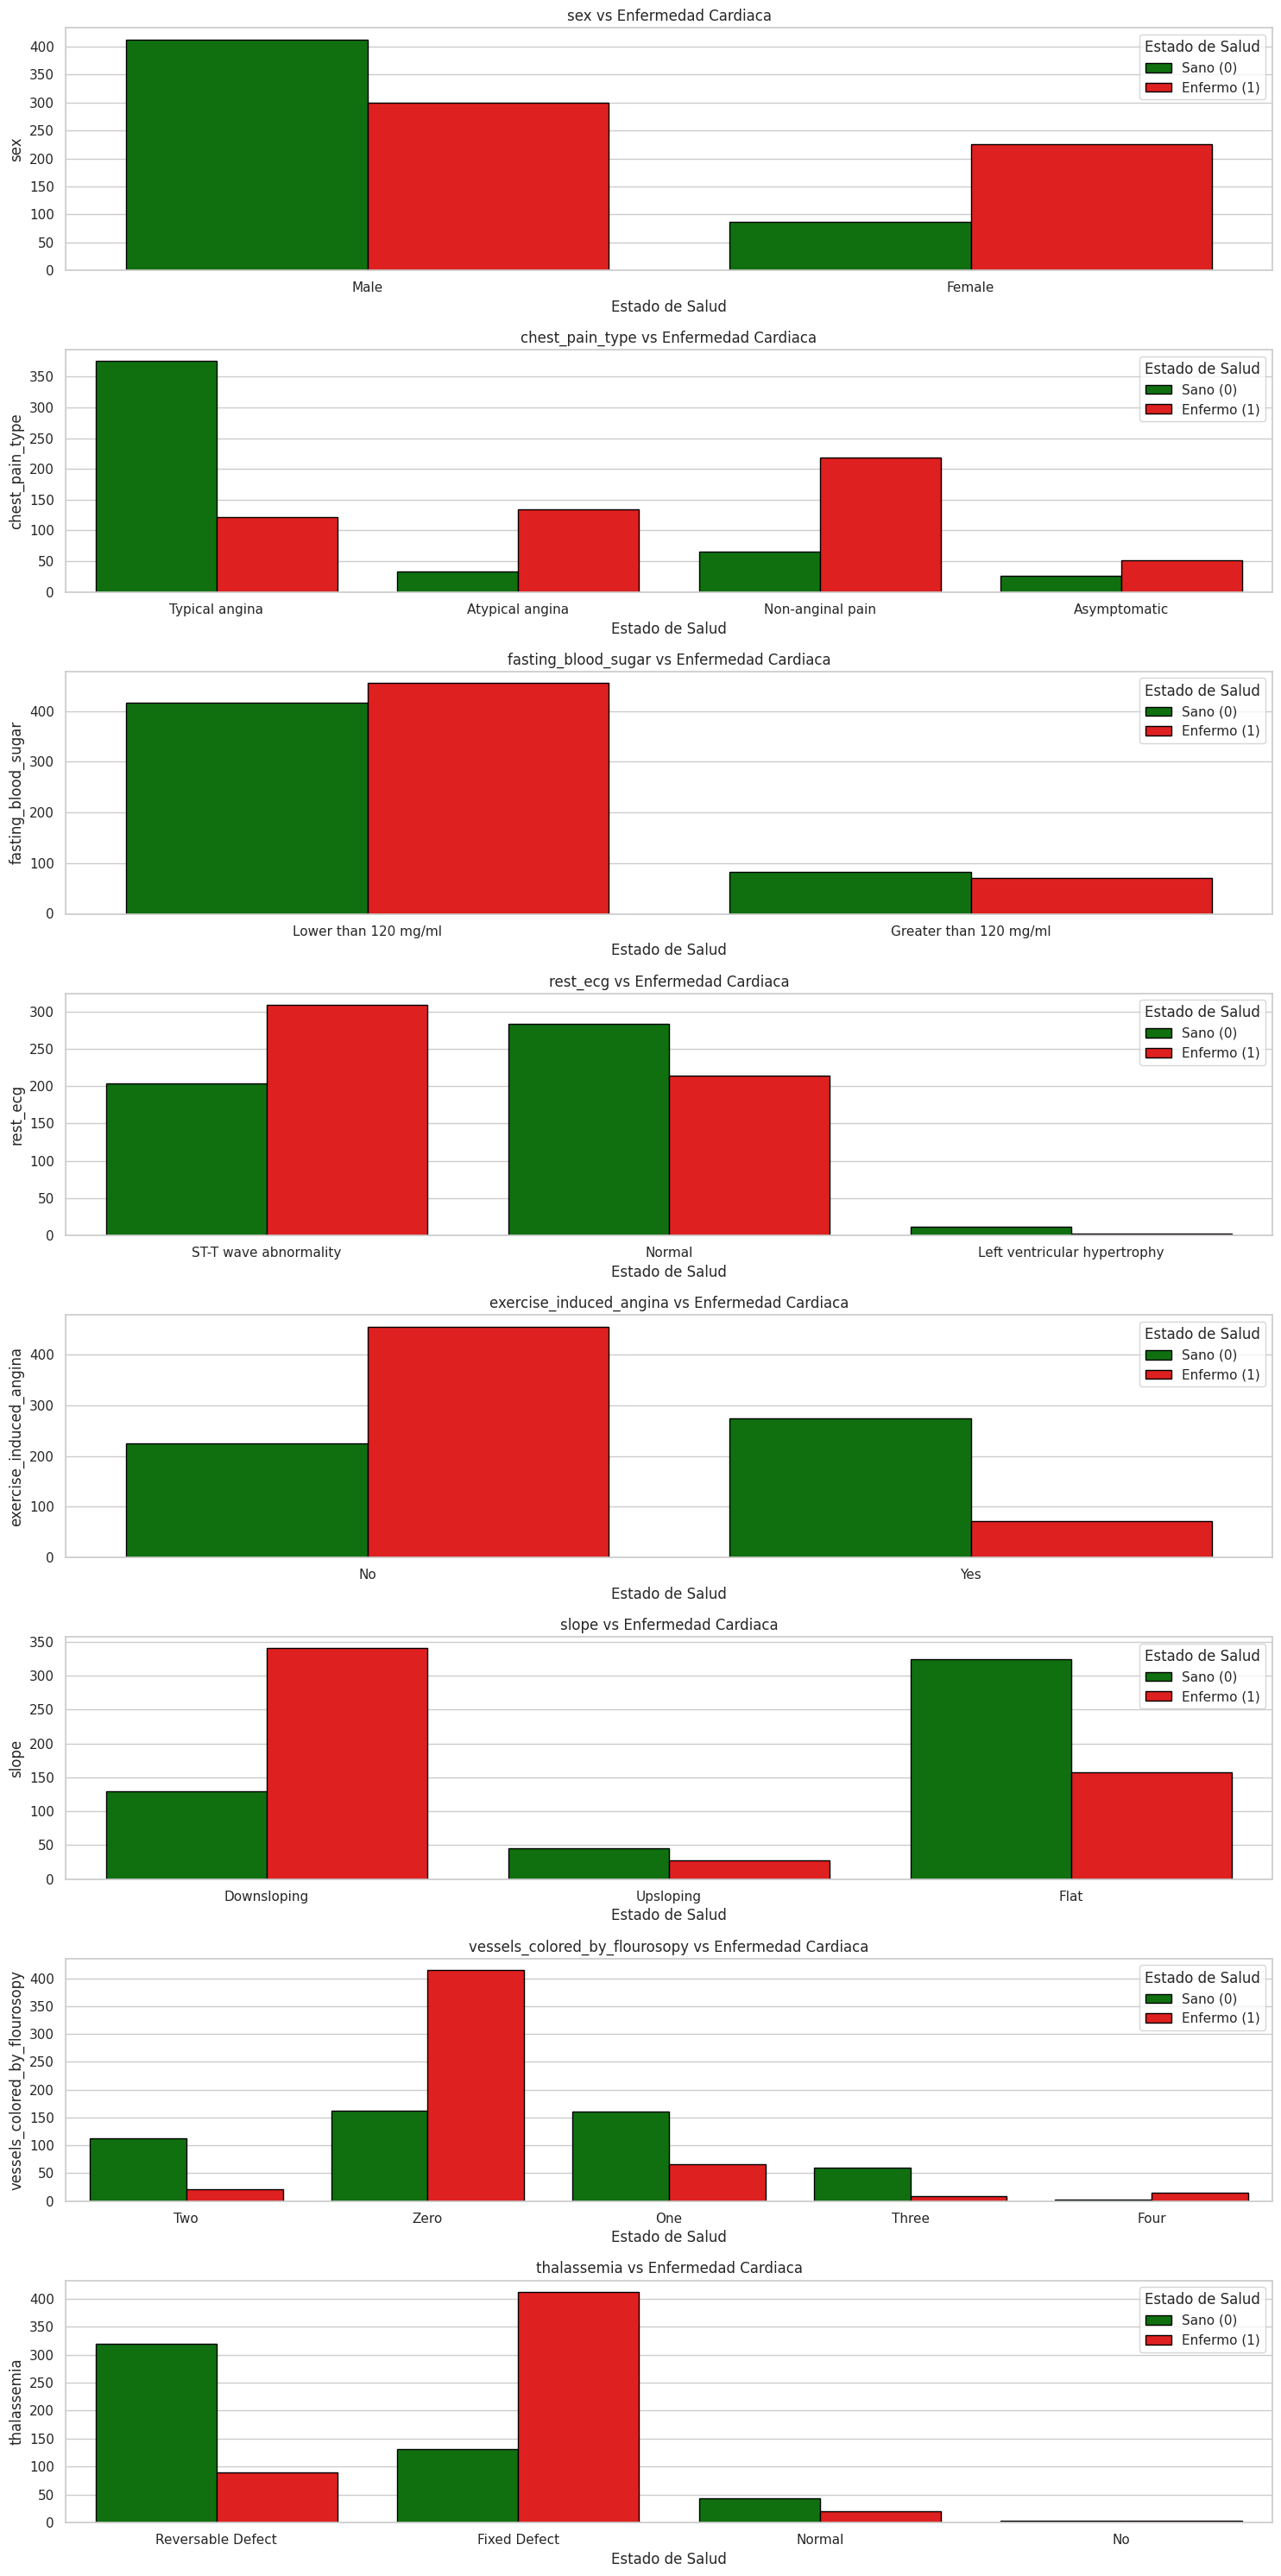

In [47]:
# Columnas categoricas
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
                       'thalassemia']

# Definir los colores personalizados para el target
colors = {0: 'green', 1: 'red'}

# Crear la figura
plt.figure(figsize=(15, 30))

# Gráficos de cajas para características numéricas
for i, feature in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    ##sns.boxplot(x='target', y=feature, data=df, palette=colors)
    sns.countplot(x=feature, data=df, hue='target', palette=colors, edgecolor='black')
    plt.title(f'{feature} vs Enfermedad Cardiaca')
    plt.xlabel('Estado de Salud')
    plt.ylabel(feature)
    plt.legend(title='Estado de Salud', labels=['Sano (0)', 'Enfermo (1)'])

plt.tight_layout()
plt.show()


  ## - Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

In [15]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
age,1025,0,0.0
sex,1025,0,0.0
chest_pain_type,1025,0,0.0
resting_blood_pressure,1025,0,0.0
cholestoral,1025,0,0.0
fasting_blood_sugar,1025,0,0.0
rest_ecg,1025,0,0.0
Max_heart_rate,1025,0,0.0
exercise_induced_angina,1025,0,0.0
oldpeak,1025,0,0.0


In [20]:
desc(df,'oldpeak')

,oldpeak
count,1025.000000
mean,1.071512
std,1.175053
min,0.000000
25%,0.000000
50%,0.800000
75%,1.800000
max,6.200000
%std/mean,109.660000


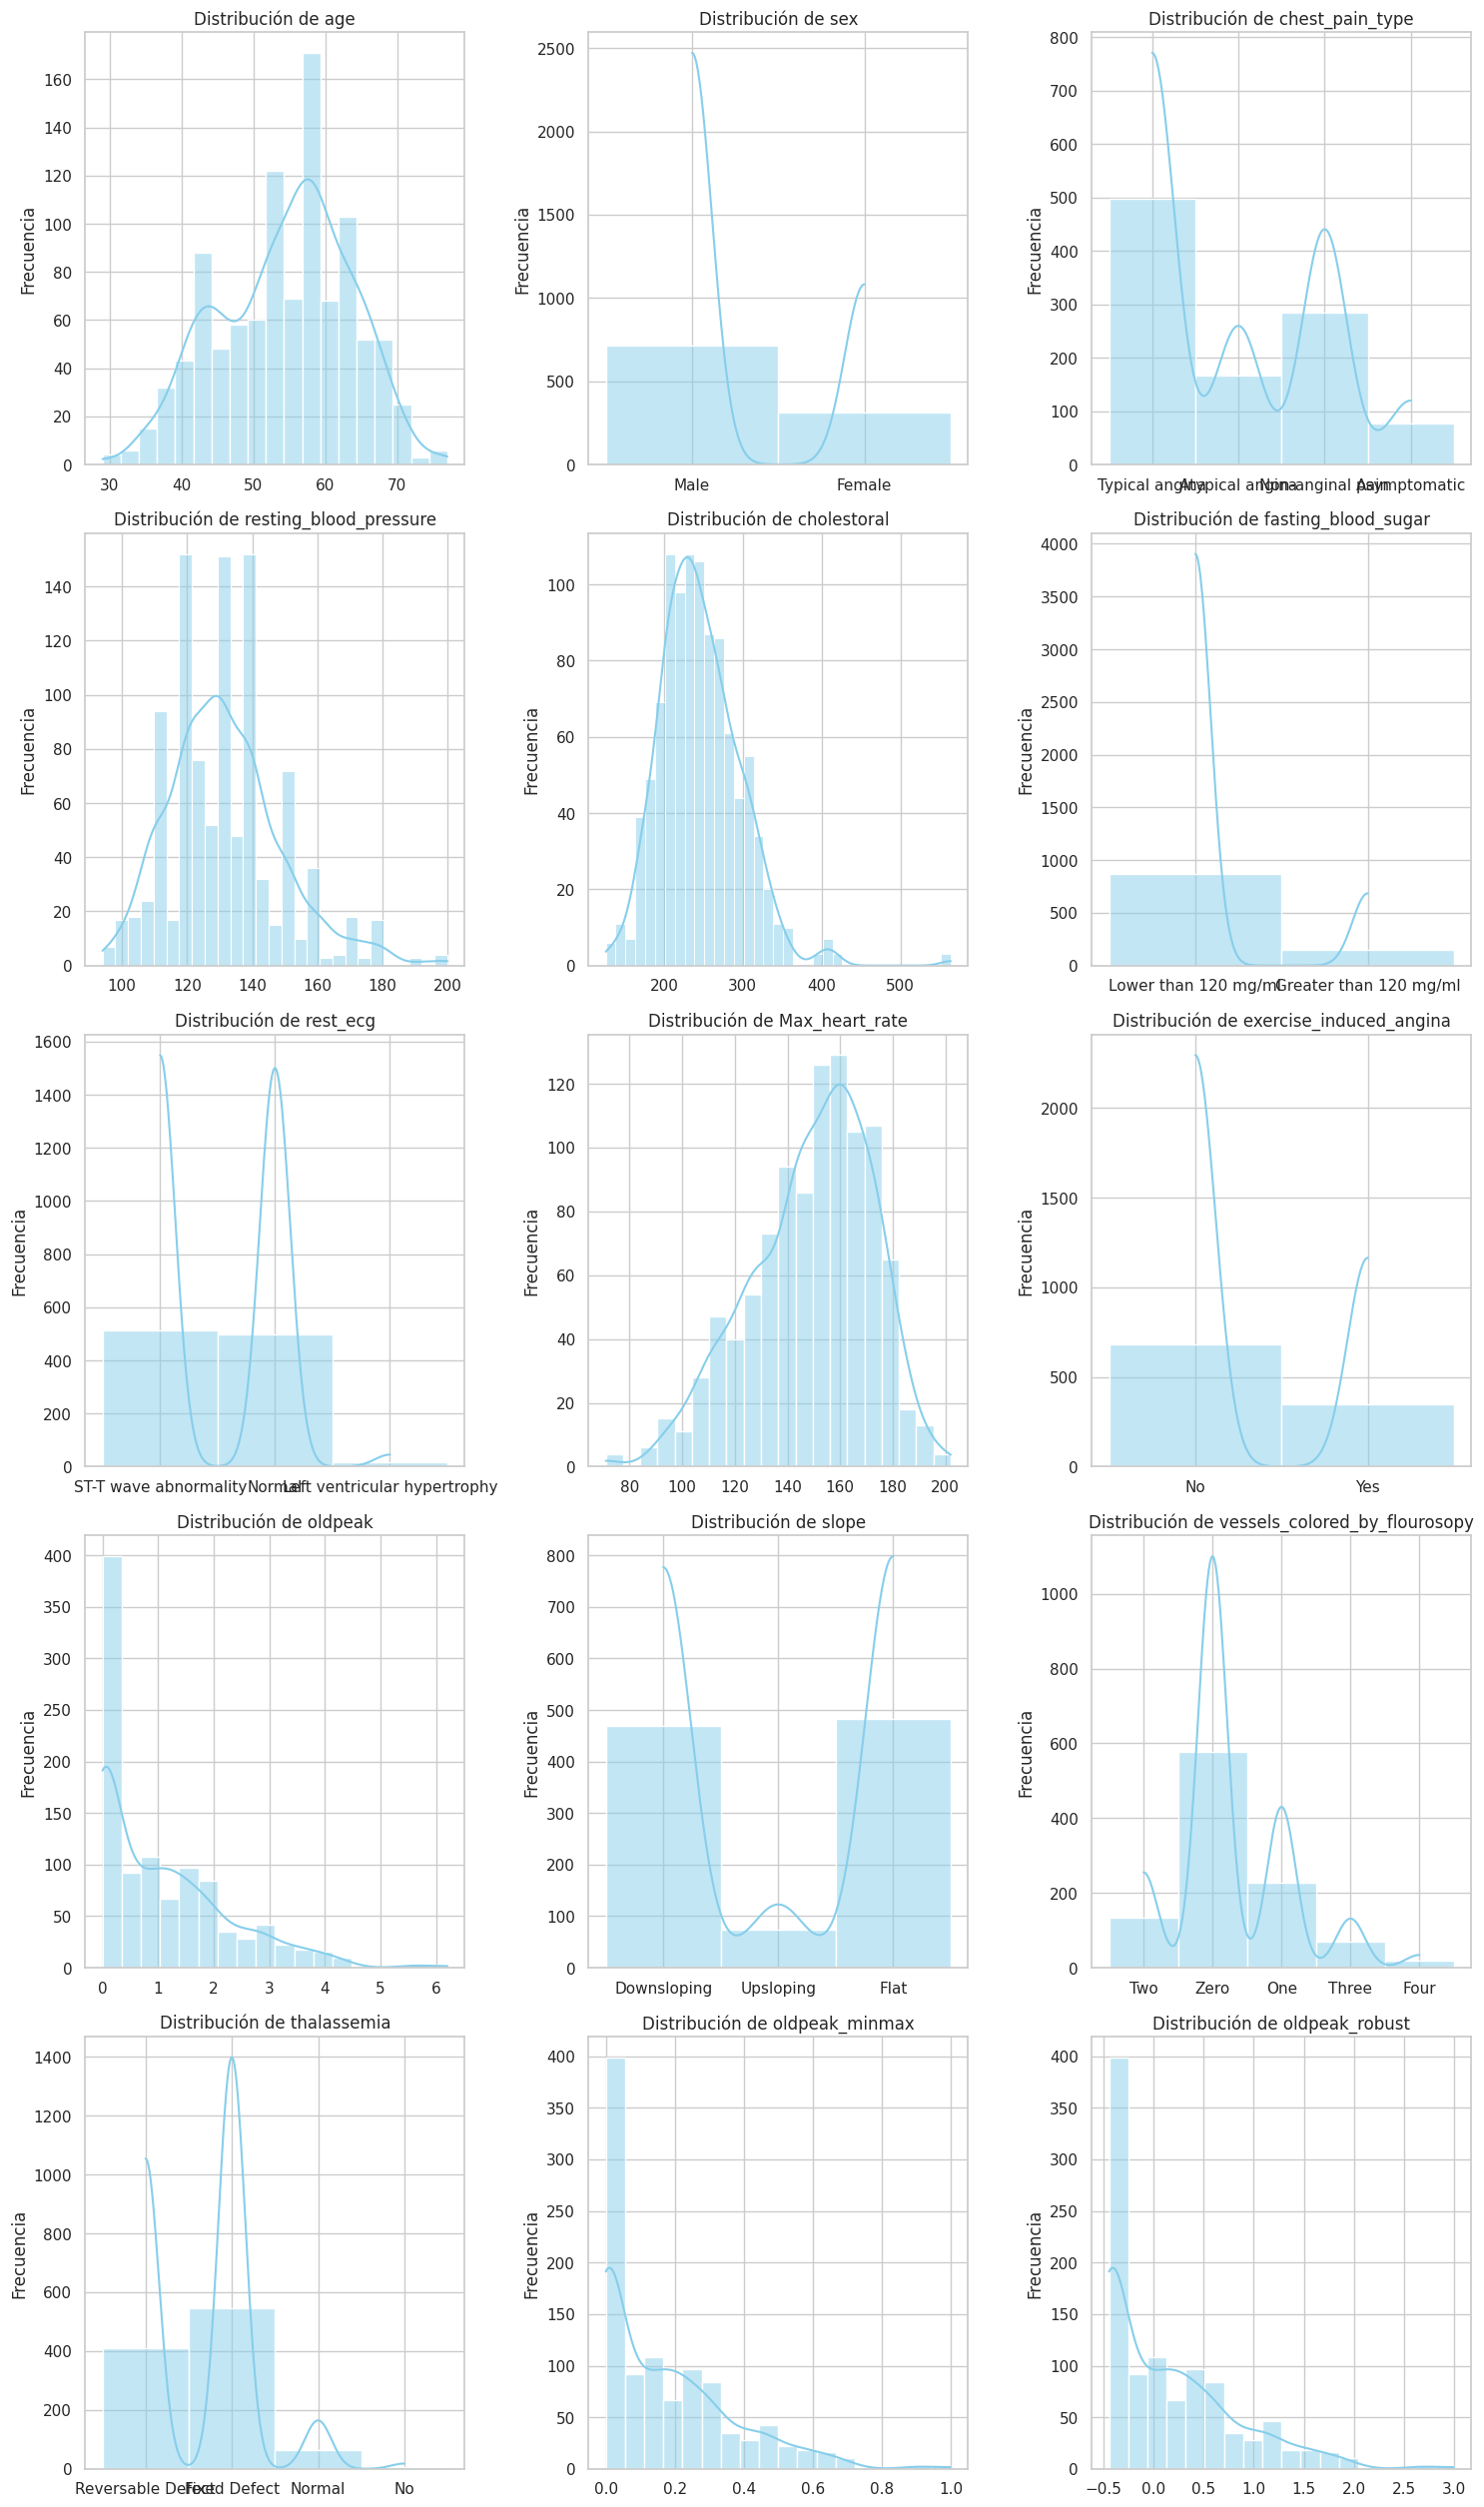

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de gráficos
sns.set(style="whitegrid")

# Crear subplots para todas las columnas excepto 'target'
columns_to_plot = df.drop('target', axis=1).columns
num_columns = len(columns_to_plot)

# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(15, 5 * ((num_columns // 3) + 1)))
axes = axes.flatten()

# Generar histogramas
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos si sobran
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


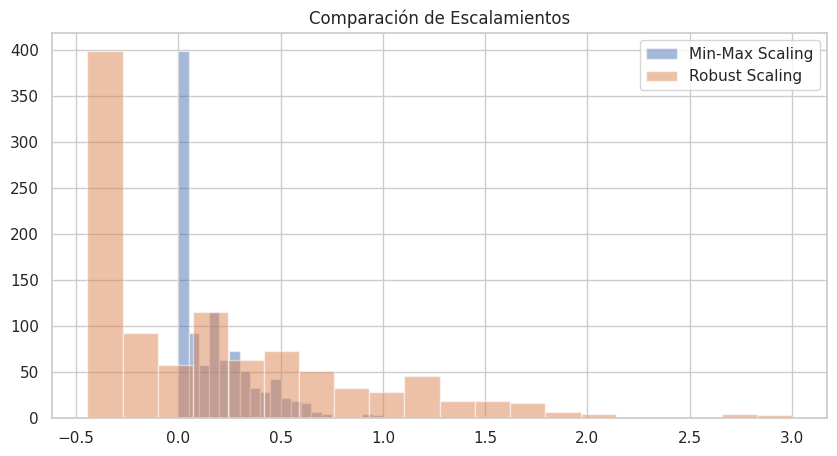

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Aplicar escalamiento
minmax = MinMaxScaler()
robust = RobustScaler()

df['oldpeak_minmax'] = minmax.fit_transform(df[['oldpeak']])
df['oldpeak_robust'] = robust.fit_transform(df[['oldpeak']])

# Visualización
plt.figure(figsize=(10, 5))
plt.hist(df['oldpeak_minmax'], bins=20, alpha=0.5, label='Min-Max Scaling')
plt.hist(df['oldpeak_robust'], bins=20, alpha=0.5, label='Robust Scaling')
plt.legend()
plt.title('Comparación de Escalamientos')
plt.show()


In [24]:
identificar_atipicos_IQR(df,['oldpeak'])

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,oldpeak_minmax,oldpeak_robust
54,55,Male,Typical angina,140,217,Lower than 120 mg/ml,ST-T wave abnormality,111,Yes,5.6,Upsloping,Zero,Reversable Defect,0,0.903226,2.666667
69,62,Female,Typical angina,160,164,Lower than 120 mg/ml,Normal,145,No,6.2,Upsloping,Three,Reversable Defect,0,1.000000,3.000000


Voy a usar RobustScaler por manejar los atipicos.

En los demas Z Scoring.

In [25]:
#Elimino las columnas que cree para elegir el escalamiento.
df.drop(['oldpeak_minmax', 'oldpeak_robust'], axis=1, inplace=True)

##2. Exploración y preprocesamiento de datos:
  - Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

<ipython-input-48-afbd05dbeacb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


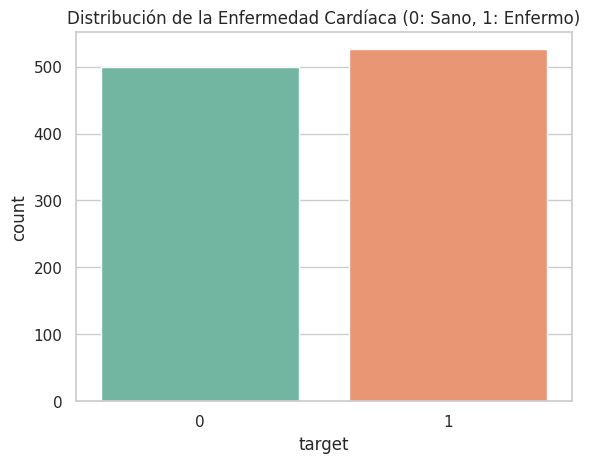

target
1    526
0    499
Name: count, dtype: int64


In [48]:
# Ver grafico de barras por target. Ver si esta balanceado
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de la variable objetivo
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribución de la Enfermedad Cardíaca (0: Sano, 1: Enfermo)')
plt.show()

# También puedes obtener la cuenta de cada clase:
print(df['target'].value_counts())




In [50]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convertir las columnas categóricas usando LabelEncoder
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
                    'thalassemia']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Definir las características y la variable objetivo
X = df.drop('target', axis=1)
y = df['target']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar el balanceo del dataset
print(f"Distribución original: {Counter(y)}")
print(f"Distribución después de SMOTE: {Counter(y_res)}")



Distribución original: Counter({1: 526, 0: 499})
Distribución después de SMOTE: Counter({0: 526, 1: 526})


In [52]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1052 non-null   int64  
 1   sex                            1052 non-null   int64  
 2   chest_pain_type                1052 non-null   int64  
 3   resting_blood_pressure         1052 non-null   int64  
 4   cholestoral                    1052 non-null   int64  
 5   fasting_blood_sugar            1052 non-null   int64  
 6   rest_ecg                       1052 non-null   int64  
 7   Max_heart_rate                 1052 non-null   int64  
 8   exercise_induced_angina        1052 non-null   int64  
 9   oldpeak                        1052 non-null   float64
 10  slope                          1052 non-null   int64  
 11  vessels_colored_by_flourosopy  1052 non-null   int64  
 12  thalassemia                    1052 non-null   i

In [53]:
from sklearn.model_selection import train_test_split

# Dividir el dataset balanceado (X_res, y_res) en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Verificar el tamaño de las divisiones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (841, 13)
Tamaño del conjunto de prueba: (211, 13)


In [54]:
# Dividir el conjunto de entrenamiento en X_train y X_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verificar el tamaño de las divisiones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")


Tamaño del conjunto de entrenamiento: (672, 13)
Tamaño del conjunto de validación: (169, 13)


# 3. Implementación de la MLP con Dropout:
  - Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
  - Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
  - Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Definir el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Capa oculta 1 con Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # 30% de Dropout

# Capa oculta 2 con Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # 30% de Dropout

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Loss en test: {test_loss}')
print(f'Accuracy en test: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5052 - loss: 20.6756 - val_accuracy: 0.4675 - val_loss: 1.6362
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 6.8940 - val_accuracy: 0.6509 - val_loss: 0.8731
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5065 - loss: 3.9172 - val_accuracy: 0.6982 - val_loss: 0.6168
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5477 - loss: 1.7971 - val_accuracy: 0.7041 - val_loss: 0.6284
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5071 - loss: 1.4529 - val_accuracy: 0.3964 - val_loss: 0.7240
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5701 - loss: 0.9375 - val_accuracy: 0.5740 - val_loss: 0.6673
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5083 - loss: 1.0510 - val_accuracy: 0.5740 - val_loss: 0.6674
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5531 - loss: 0.8784 - val_accuracy: 0.6805 -

#4. Entrenamiento del modelo:
  - Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
  - Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5107 - loss: 2.1938 - val_accuracy: 0.7160 - val_loss: 0.5891
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5348 - loss: 1.3787 - val_accuracy: 0.6213 - val_loss: 0.6510
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5457 - loss: 0.9541 - val_accuracy: 0.5503 - val_loss: 0.6733
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5437 - loss: 0.8655 - val_accuracy: 0.5976 - val_loss: 0.6602
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5705 - loss: 0.8161 - val_accuracy: 0.5680 - val_loss: 0.6530
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5698 - loss: 0.7765 - val_accuracy: 0.4852 - val_loss: 0.6700


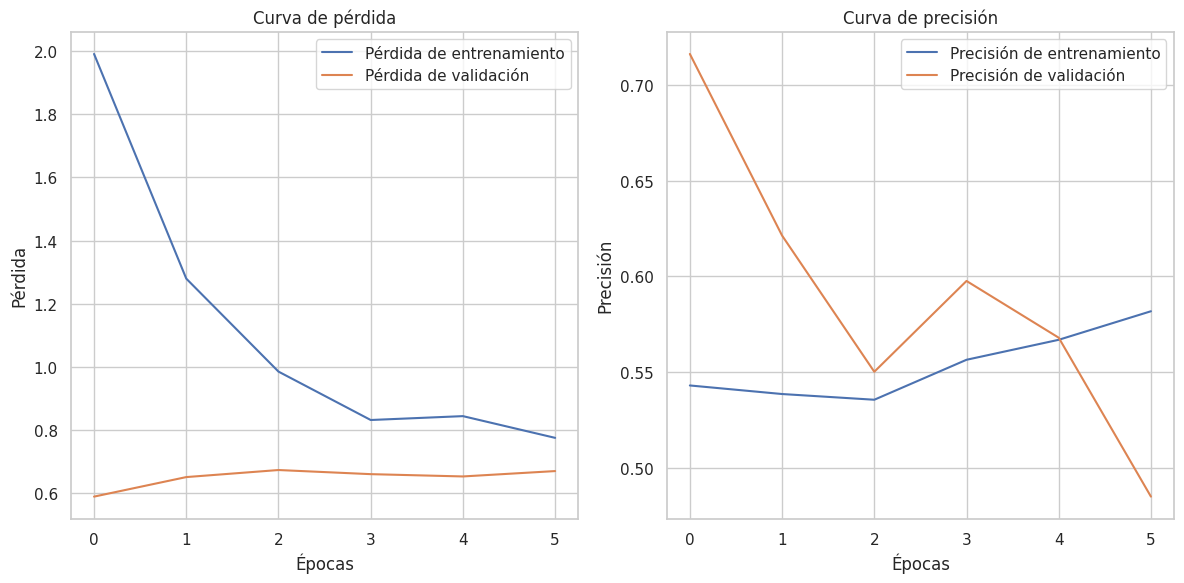

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Definir el early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


# 5. Evaluación del modelo:
  - Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
  - Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precisión: 0.6777
Recall: 0.6838
F1-score: 0.7018


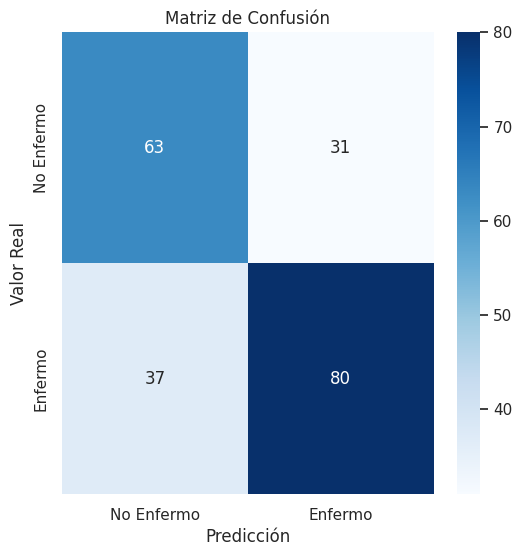

In [57]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar las métricas
print(f'Precisión: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


## Discusión sobre el impacto de Dropout y Early Stopping:

**Dropout**: Reduce el sobreajuste al forzar a la red a no depender de neuronas específicas, mejorando la generalización. Esto puede resultar en una ligera disminución de la precisión en el conjunto de entrenamiento, pero mejora el rendimiento en el conjunto de prueba.

**Early Stopping**: Evita el sobreajuste deteniendo el entrenamiento cuando la mejora en la validación se estabiliza, evitando que el modelo aprenda ruido. Esto suele mejorar la precisión en el conjunto de prueba al prevenir sobreentrenamiento.

En comparación con una MLP básica sin estas técnicas, podrías observar una mejor generalización y un menor sobreajuste al usar dropout y early stopping.
